# 将国家按照幸福状态进行聚类，并分析聚类结果与国家所在区域的关系

# 调用的sklearn kmeans

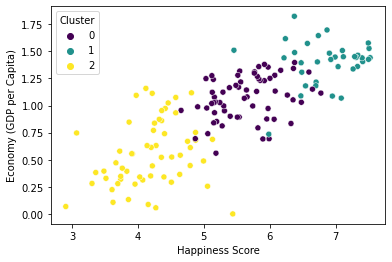

Cluster                           0   1   2
Region                                     
Australia and New Zealand         0   2   0
Central and Eastern Europe       23   1   5
Eastern Asia                      5   1   0
Latin America and Caribbean      17   6   1
Middle East and Northern Africa   7   6   6
North America                     0   2   0
Southeastern Asia                 4   2   3
Southern Asia                     1   0   6
Sub-Saharan Africa                1   0  37
Western Europe                    6  15   0


In [43]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 使用Pandas读取CSV数据
data = pd.read_csv('2016_world_happiness.csv')

# 预处理数据
data1 = data.drop(['Country', 'Region', 'Happiness Rank'], axis=1)

# 使用sklearn的StandardScaler进行缩放
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data1)

# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_features)

# 将聚类标签添加到原始数据中
data['Cluster'] = kmeans.labels_

# 绘制聚类结果
sns.scatterplot(data=data, x='Happiness Score', y='Economy (GDP per Capita)', hue='Cluster',  palette='viridis')
plt.show()

# 分析聚类结果与国家所在区域的关系
sklearn_region_cluster = data.groupby(['Region', 'Cluster']).size().unstack(fill_value=0)
print(sklearn_region_cluster)
sklearn_region_cluster.to_csv('sklearn_result.csv')



根据聚类结果，可以得出以下分析：

按照幸福状态递减：1>0>2

Cluster 0: 这个聚类中的国家主要集中于Central and Eastern Europe 和 Latin America and Caribbean

Cluster 1: 这个聚类中包含来自多个区域的国家，但有一些区域在其中占主导地位。例如，Western Europe在该聚类中占据较大比例。

Cluster 2: 这个聚类中的国家主要来自Sub-Saharan Africa和Southern Asia两个区域。



通过对聚类结果和国家所在区域的关系的分析，我们可以初步得出以下结论：

- 幸福感较高的国家主要分布在Western Europe和Latin America and Caribbean,Middle East and Northern Africa等地区。
- Sub-Saharan Africa地区的国家幸福感普遍较低，可能面临较多的经济和社会问题。
- 幸福感较高的国家主要集中在Cluster 1，这可能是由于这些国家在经济、社会和政治等方面都取得了较好的表现。

# 自己实现的kmeans

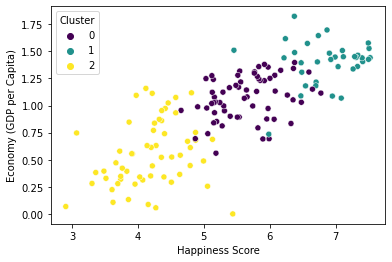

Cluster                           0   1   2
Region                                     
Australia and New Zealand         0   2   0
Central and Eastern Europe       23   1   5
Eastern Asia                      5   1   0
Latin America and Caribbean      17   6   1
Middle East and Northern Africa   7   6   6
North America                     0   2   0
Southeastern Asia                 4   2   3
Southern Asia                     1   0   6
Sub-Saharan Africa                1   0  37
Western Europe                    6  15   0


In [44]:
import numpy as np
import matplotlib.pyplot as plt


class KMeans:  # 定义KMeans类
    def __init__(self, k=2, max_iter=500):  # 初始化方法，设置默认聚类数为2，最大迭代次数为500
        self.k = k  # 将聚类数k保存到实例变量中
        self.max_iter = max_iter  # 将最大迭代次数保存到实例变量中

    def initialize_centroids(self, points):  # 定义初始化质心方法
        centroids = points.copy()  # 将数据点进行复制
        np.random.shuffle(centroids)  # 对数据点进行随机打乱
        return centroids[:self.k]  # 返回前k个数据点作为初始质心

    def closest_centroid(self, points, centroids):  # 定义计算最近质心方法
        distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))  # 计算每个数据点到每个质心的距离
        return np.argmin(distances, axis=0)  # 返回每个数据点最近的质心的索引

    def move_centroids(self, points, closest, centroids):  # 定义移动质心方法
        return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])  # 根据数据点最近的质心索引，计算每个簇新的质心位置

    def fit(self, data):  # 定义拟合方法
        self.centroids = self.initialize_centroids(data)  # 初始化质心
        for i in range(0, self.max_iter):  # 循环迭代
            new_centroids = self.move_centroids(data, self.closest_centroid(data, self.centroids), self.centroids)  # 计算新的质心
            if np.array_equal(new_centroids, self.centroids):  # 如果新的质心和旧的质心相等
                self.labels_ = self.closest_centroid(data, self.centroids)  # 保存每个数据点的簇标签
                return  # 结束拟合
            else:  # 如果新的质心和旧的质心不相等
                self.centroids = new_centroids  # 更新质心

    def predict(self, data):  # 定义预测方法
        return self.closest_centroid(data, self.centroids)  # 返回预测的簇标签
    
    
    
    
# 使用Pandas读取CSV数据
data = pd.read_csv('2016_world_happiness.csv')

# 预处理数据
data1 = data.drop(['Country', 'Region', 'Happiness Rank'], axis=1)

# 使用sklearn的StandardScaler进行缩放
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data1)

# 创建KMeans模型并进行训练
custom_kmeans = KMeans(k=3)
kmeans.fit(scaled_features)


# 将聚类标签添加到原始数据中
data['Cluster'] = kmeans.labels_

# 绘制聚类结果
sns.scatterplot(data=data, x='Happiness Score', y='Economy (GDP per Capita)', hue='Cluster',  palette='viridis')
plt.show()

# 分析聚类结果与国家所在区域的关系
my_region_cluster = data.groupby(['Region', 'Cluster']).size().unstack(fill_value=0)
print(my_region_cluster)
my_region_cluster.to_csv('my_result.csv')




# 结果比较

In [45]:
print(my_region_cluster)
print(sklearn_region_cluster)

Cluster                           0   1   2
Region                                     
Australia and New Zealand         0   2   0
Central and Eastern Europe       23   1   5
Eastern Asia                      5   1   0
Latin America and Caribbean      17   6   1
Middle East and Northern Africa   7   6   6
North America                     0   2   0
Southeastern Asia                 4   2   3
Southern Asia                     1   0   6
Sub-Saharan Africa                1   0  37
Western Europe                    6  15   0
Cluster                           0   1   2
Region                                     
Australia and New Zealand         0   2   0
Central and Eastern Europe       23   1   5
Eastern Asia                      5   1   0
Latin America and Caribbean      17   6   1
Middle East and Northern Africa   7   6   6
North America                     0   2   0
Southeastern Asia                 4   2   3
Southern Asia                     1   0   6
Sub-Saharan Africa              

我们可以看到，二者的结果是一样的。

# 优化

使用 K-means++ 初始化方法，并添加收敛条件

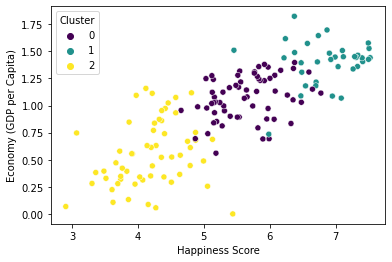

Cluster                           0   1   2
Region                                     
Australia and New Zealand         0   2   0
Central and Eastern Europe       23   1   5
Eastern Asia                      5   1   0
Latin America and Caribbean      17   6   1
Middle East and Northern Africa   7   6   6
North America                     0   2   0
Southeastern Asia                 4   2   3
Southern Asia                     1   0   6
Sub-Saharan Africa                1   0  37
Western Europe                    6  15   0


In [46]:
import numpy as np
from scipy.spatial.distance import cdist

class KMeans:
    def __init__(self, k=2, max_iter=500, tol=1e-4):  # 添加了一个tol参数，用于定义收敛的阈值
        self.k = k
        self.max_iter = max_iter
        self.tol = tol  # 收敛条件，即质心变化的幅度小于某个阈值

    def initialize_centroids(self, points):  # 使用K-means++初始化方法
        centroids = points[np.random.choice(points.shape[0], 1, replace=False)]  # 随机选取一个数据点作为第一个质心
        for _ in range(1, self.k):  # 循环 k-1 次
            dist = np.min(cdist(points, centroids), axis=1)  # 计算每个点到已有质心的最短距离
            probabilities = dist / np.sum(dist)  # 计算概率
            # 选择下一个质心，选择的概率与点到已有质心的最短距离成正比
            centroids = np.vstack((centroids, points[np.random.choice(points.shape[0], 1, p=probabilities, replace=False)]))  
        return centroids

    def closest_centroid(self, points, centroids):  # 未修改
        return np.argmin(cdist(points, centroids), axis=1)

    def move_centroids(self, points, closest, centroids):  # 未修改
        return np.array([points[closest==k].mean(axis=0) for k in range(self.k)])

    def fit(self, data):  # 添加了收敛条件
        self.centroids = self.initialize_centroids(data)
        for _ in range(self.max_iter):
            closest = self.closest_centroid(data, self.centroids)
            new_centroids = self.move_centroids(data, closest, self.centroids)
            # 考虑收敛条件，如果新的质心和旧的质心的变化幅度小于阈值，则认为已经收敛
            if np.allclose(new_centroids, self.centroids, atol=self.tol):  
                self.labels_ = closest
                return
            self.centroids = new_centroids

        self.labels_ = self.closest_centroid(data, self.centroids)  # 如果达到最大迭代次数还未收敛，则直接返回最后的结果

    def predict(self, data):  # 未修改
        return self.closest_centroid(data, self.centroids)

    
    

    
# 使用Pandas读取CSV数据
data = pd.read_csv('2016_world_happiness.csv')

# 预处理数据
data1 = data.drop(['Country', 'Region', 'Happiness Rank'], axis=1)

# 使用sklearn的StandardScaler进行缩放
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data1)

# 创建KMeans模型并进行训练
custom_kmeans = KMeans(k=3)
kmeans.fit(scaled_features)


# 将聚类标签添加到原始数据中
data['Cluster'] = kmeans.labels_

# 绘制聚类结果
sns.scatterplot(data=data, x='Happiness Score', y='Economy (GDP per Capita)', hue='Cluster',  palette='viridis')
plt.show()

# 分析聚类结果与国家所在区域的关系
my_region_cluster2 = data.groupby(['Region', 'Cluster']).size().unstack(fill_value=0)
print(my_region_cluster2)
my_region_cluster2.to_csv('my_result2.csv')
